# imports and load dataframe

In SOC dataset, the task is to predict the SOC of the next time step by using the current, voltage and the SOC of the previous time steps. By using this dataset,we do the experiments I,II:

importing libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


load dataframe

In [ ]:
df=pd.read_excel('SOC_dataset.xlsx')
columns=['time', 'current(amp)', 'voltage(volts)','SOC']
df.columns=columns
df

,time,current(amp),voltage(volts),SOC
0,86167.58,0.00000,4.151217,1.000000e+00
1,86197.58,0.00000,4.151293,1.000000e+00
2,86227.57,0.00000,4.151293,1.000000e+00
3,86227.61,6.00389,4.095827,9.999970e-01
4,86227.77,6.00114,4.065385,9.999726e-01
...,...,...,...,...
83534,689558.29,0.00000,3.347982,1.976197e-14
83535,689568.29,0.00000,3.348058,1.976197e-14
83536,689578.29,0.00000,3.348135,1.976197e-14
83537,689588.29,0.00000,3.347906,1.976197e-14


# Expriment I

The goal of this experiment is to see the effect of sequence length on this dataset. Preprocess the dataset and use the sequence length (window size) of $n_{s_i}$ =3. Train a simple RNN on this dataset. Repeat this experiment with: $n_s$=4,5,6,…,10

In [ ]:
from sklearn.model_selection import train_test_split

data=np.array(df)

def data_preprocess(Length):
  X=np.empty((len(data[:,0])-Length,Length,3))
  for i in range((len(data[:,0])-Length)):
    X[i,:,:]=data[i:i+Length,1:]
  y=np.empty((len(data[:])-Length,1))
  y[:,0]=data[Length:,3]

  x=X-X.mean((0,1))/X.max((0,1))-X.min((0,1))
  x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.2,shuffle=False)
  return x_train,y_train,x_test,y_test

  print(x_train.shape)


xtrain3,xtest3,ytrain3,ytest3=data_preprocess(3)
xtrain4,xtest4,ytrain4,ytest4=data_preprocess(4)
xtrain5,xtest5,ytrain5,ytest5=data_preprocess(5)
xtrain6,xtest6,ytrain6,ytest6=data_preprocess(6)
xtrain7,xtest7,ytrain7,ytest7=data_preprocess(7)
xtrain8,xtest8,ytrain8,ytest8=data_preprocess(8)
xtrain9,xtest9,ytrain9,ytest9=data_preprocess(9)
xtrain10,xtest10,ytrain10,ytest10=data_preprocess(10)

print(f'our train  shape for 3 sequence of data for input and output Respectively are : {xtrain3.shape} , {ytrain3.shape} \n \
  and for our test input shape are : {xtest3.shape} , {ytest3.shape}\n ','-'*30,'\n')

print(f'our train  shape for 4 sequence of data for input and output Respectively are : {xtrain4.shape} , {ytrain4.shape} \n \
  and for our test input shape are : {xtest4.shape} , {ytest4.shape}\n ','-'*30,'\n')

print(f'our train  shape for 5 sequence of data for input and output Respectively are : {xtrain5.shape} , {ytrain5.shape} \n \
  and for our test input shape are : {xtest5.shape} , {ytest5.shape}\n ','-'*30,'\n')

print(f'our train  shape for 6 sequence of data for input and output Respectively are : {xtrain6.shape} , {ytrain6.shape} \n \
  and for our test input shape are : {xtest6.shape} , {ytest6.shape}\n ','-'*30,'\n')


print(f'our train  shape for 7 sequence of data for input and output Respectively are : {xtrain7.shape} , {ytrain7.shape} \n \
  and for our test input shape are : {xtest7.shape} , {ytest7.shape}\n ','-'*30,'\n')


print(f'our train  shape for 8 sequence of data for input and output Respectively are : {xtrain8.shape} , {ytrain8.shape} \n \
  and for our test input shape are : {xtest8.shape} , {ytest8.shape}\n ','-'*30,'\n')


print(f'our train  shape for 9 sequence of data for input and output Respectively are : {xtrain9.shape} , {ytrain9.shape} \n \
  and for our test input shape are : {xtest9.shape} , {ytest9.shape}\n ','-'*30,'\n')


print(f'our train  shape for 10 sequence of data for input and output Respectively are : {xtrain10.shape} , {ytrain10.shape} \n \
  and for our test input shape are : {xtest10.shape} , {ytest10.shape}\n ','-'*30,'\n')

our train  shape for 3 sequence of data for input and output Respectively are : (66828, 3, 3) , (66828, 1) 
   and for our test input shape are : (16708, 3, 3) , (16708, 1)
  ------------------------------ 

our train  shape for 4 sequence of data for input and output Respectively are : (66828, 4, 3) , (66828, 1) 
   and for our test input shape are : (16707, 4, 3) , (16707, 1)
  ------------------------------ 

our train  shape for 5 sequence of data for input and output Respectively are : (66827, 5, 3) , (66827, 1) 
   and for our test input shape are : (16707, 5, 3) , (16707, 1)
  ------------------------------ 

our train  shape for 6 sequence of data for input and output Respectively are : (66826, 6, 3) , (66826, 1) 
   and for our test input shape are : (16707, 6, 3) , (16707, 1)
  ------------------------------ 

our train  shape for 7 sequence of data for input and output Respectively are : (66825, 7, 3) , (66825, 1) 
   and for our test input shape are : (16707, 7, 3) , (16707

## <h2>RNN

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,Input,SimpleRNN

model

In [ ]:
model_matrix=[]

for i in range(3,11):
  input=Input((i,3))
  hidden1=SimpleRNN(20,activation='relu',return_sequences=True)(input)
  hidden2=SimpleRNN(20,activation='relu',return_sequences=True)(hidden1)
  hidden3=SimpleRNN(5,activation='relu',return_sequences=False)(hidden2)
  output=Dense(1,activation='linear')(hidden3)
  model_matrix.append(Model(inputs=input,outputs=output))

for i in range(8):
  model_matrix[i].summary()
  print('\n'*2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 3)]            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 3, 20)             480       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 3, 20)             820       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 5)                 130       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 1,436
Trainable params: 1,436
Non-trainable params: 0
_________________________________________________________________



Model: "model_1"
_______________________________________

In [ ]:
from sklearn import model_selection
for i in range(8):
  model_matrix[i].compile(optimizer='adam',loss='MSE')


results3=model_matrix[0].fit(xtrain3,ytrain3,batch_size=100,epochs=20,validation_data=(xtest3,ytest3))
results4=model_matrix[1].fit(xtrain4,ytrain4,batch_size=100,epochs=20,validation_data=(xtest4,ytest4))
results5=model_matrix[2].fit(xtrain5,ytrain5,batch_size=100,epochs=20,validation_data=(xtest5,ytest5))
results6=model_matrix[3].fit(xtrain6,ytrain6,batch_size=100,epochs=20,validation_data=(xtest6,ytest6))
results7=model_matrix[4].fit(xtrain7,ytrain7,batch_size=100,epochs=20,validation_data=(xtest7,ytest7))
results8=model_matrix[5].fit(xtrain8,ytrain8,batch_size=100,epochs=20,validation_data=(xtest8,ytest8))
results9=model_matrix[6].fit(xtrain9,ytrain9,batch_size=100,epochs=20,validation_data=(xtest9,ytest9))
results10=model_matrix[7].fit(xtrain10,ytrain10,batch_size=100,epochs=20,validation_data=(xtest10,ytest10))

Epoch 1/20
669/669 [==============================] - 6s 6ms/step - loss: 0.0032 - val_loss: 2.2444e-04
Epoch 2/20
669/669 [==============================] - 4s 6ms/step - loss: 8.7325e-05 - val_loss: 3.5695e-05
Epoch 3/20
669/669 [==============================] - 3s 5ms/step - loss: 3.0114e-05 - val_loss: 3.1127e-05
Epoch 4/20
669/669 [==============================] - 4s 5ms/step - loss: 3.2262e-05 - val_loss: 1.7758e-05
Epoch 5/20
669/669 [==============================] - 3s 5ms/step - loss: 4.2697e-05 - val_loss: 2.7646e-05
Epoch 6/20
669/669 [==============================] - 3s 5ms/step - loss: 3.4535e-05 - val_loss: 8.9214e-06
Epoch 7/20
669/669 [==============================] - 4s 5ms/step - loss: 3.5479e-05 - val_loss: 2.2019e-05
Epoch 8/20
669/669 [==============================] - 3s 5ms/step - loss: 2.3242e-05 - val_loss: 4.8369e-06
Epoch 9/20
669/669 [==============================] - 4s 6ms/step - loss: 2.8435e-05 - val_loss: 8.3243e-06
Epoch 10/20
669/669 [===========

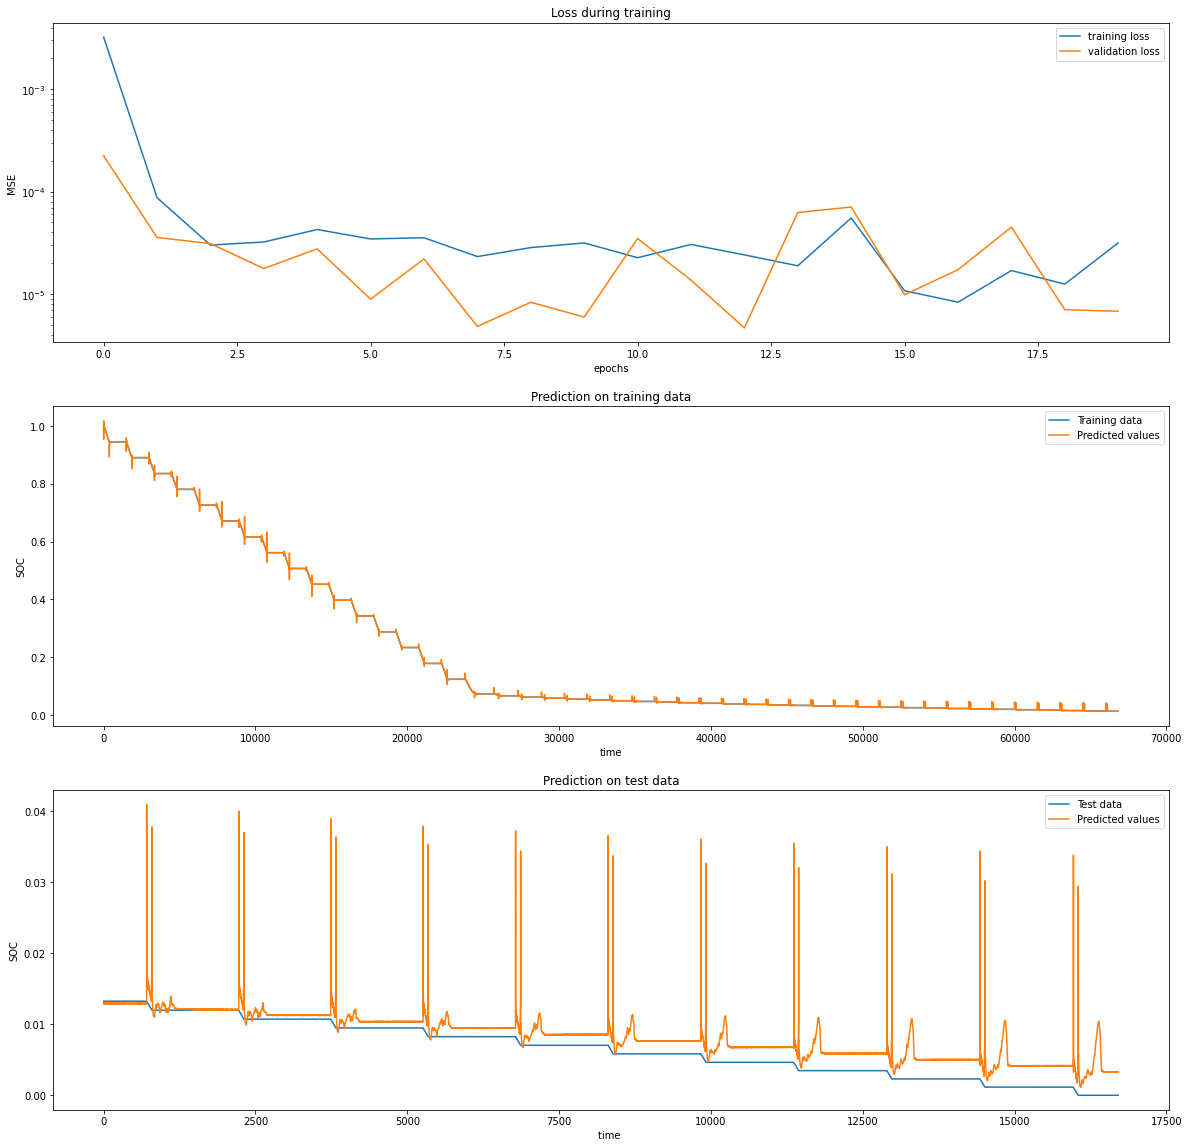






----------------------------------------------------------------------------------------------------


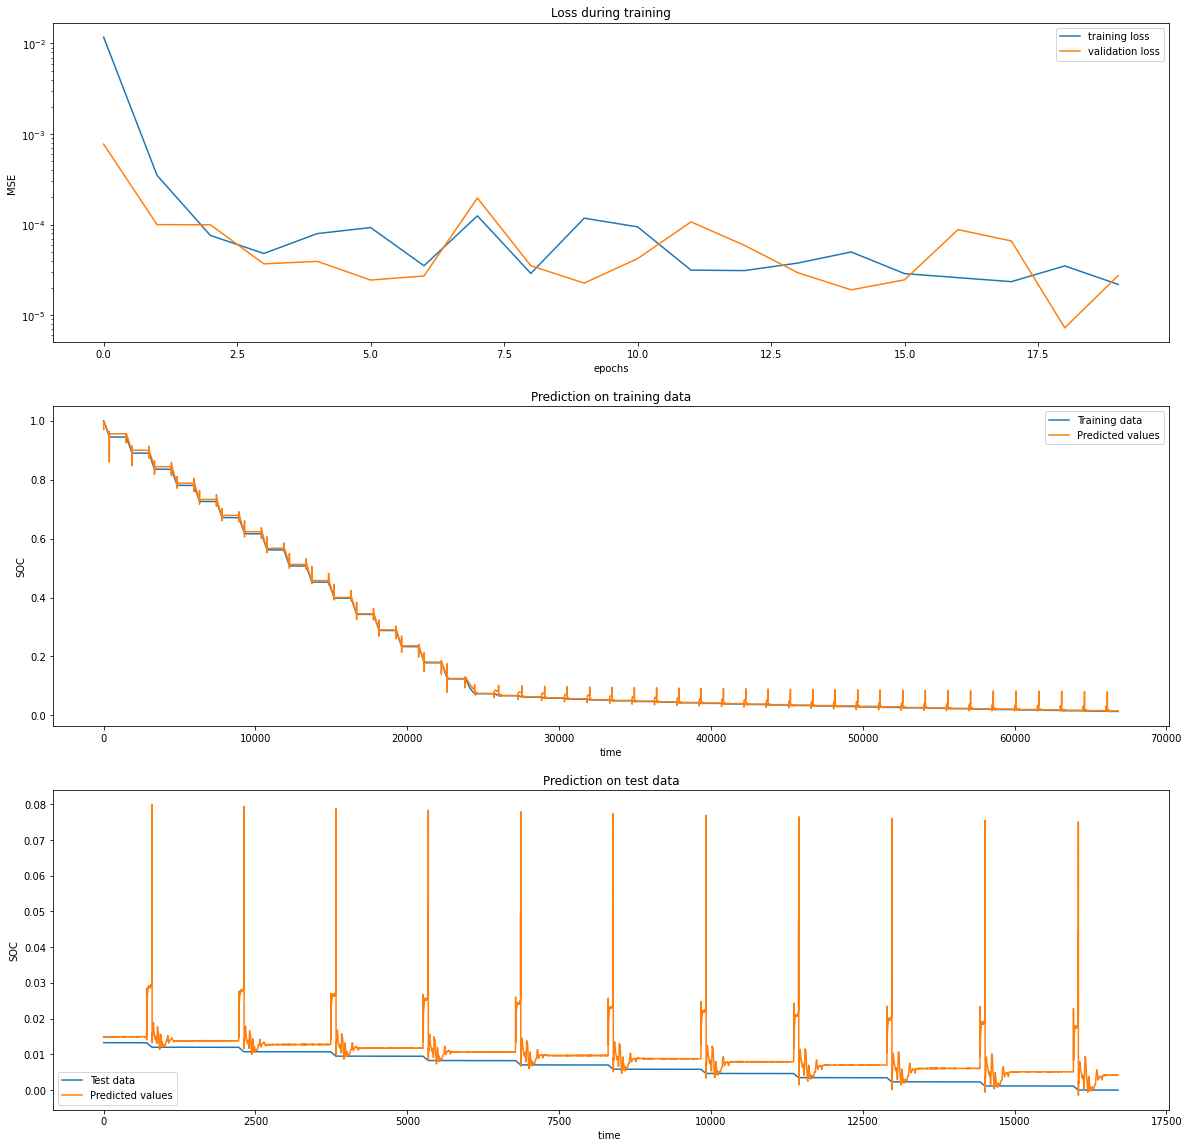






----------------------------------------------------------------------------------------------------


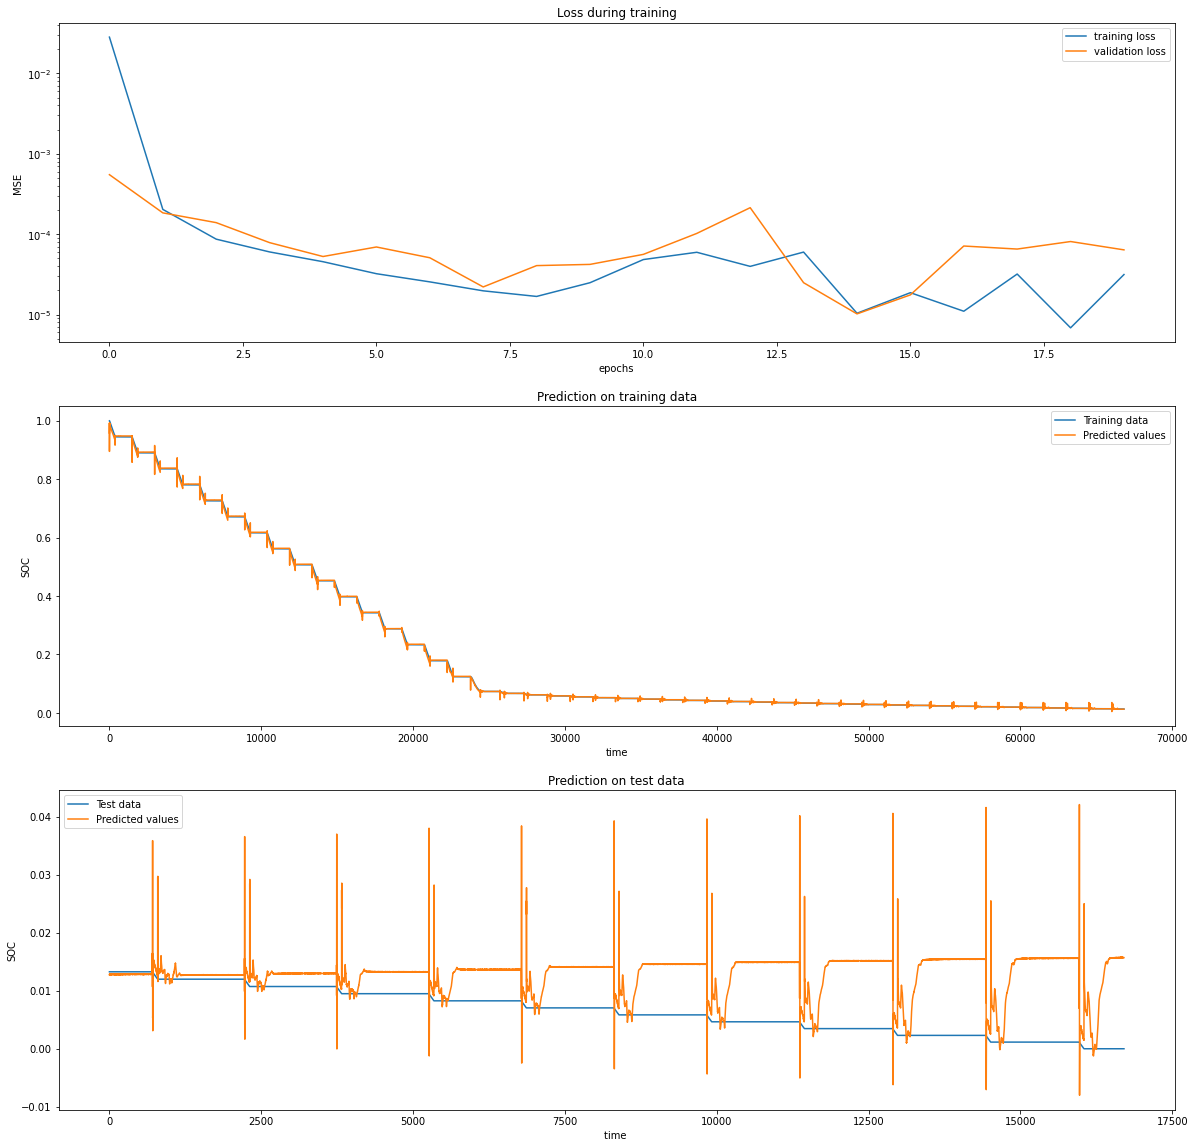






----------------------------------------------------------------------------------------------------


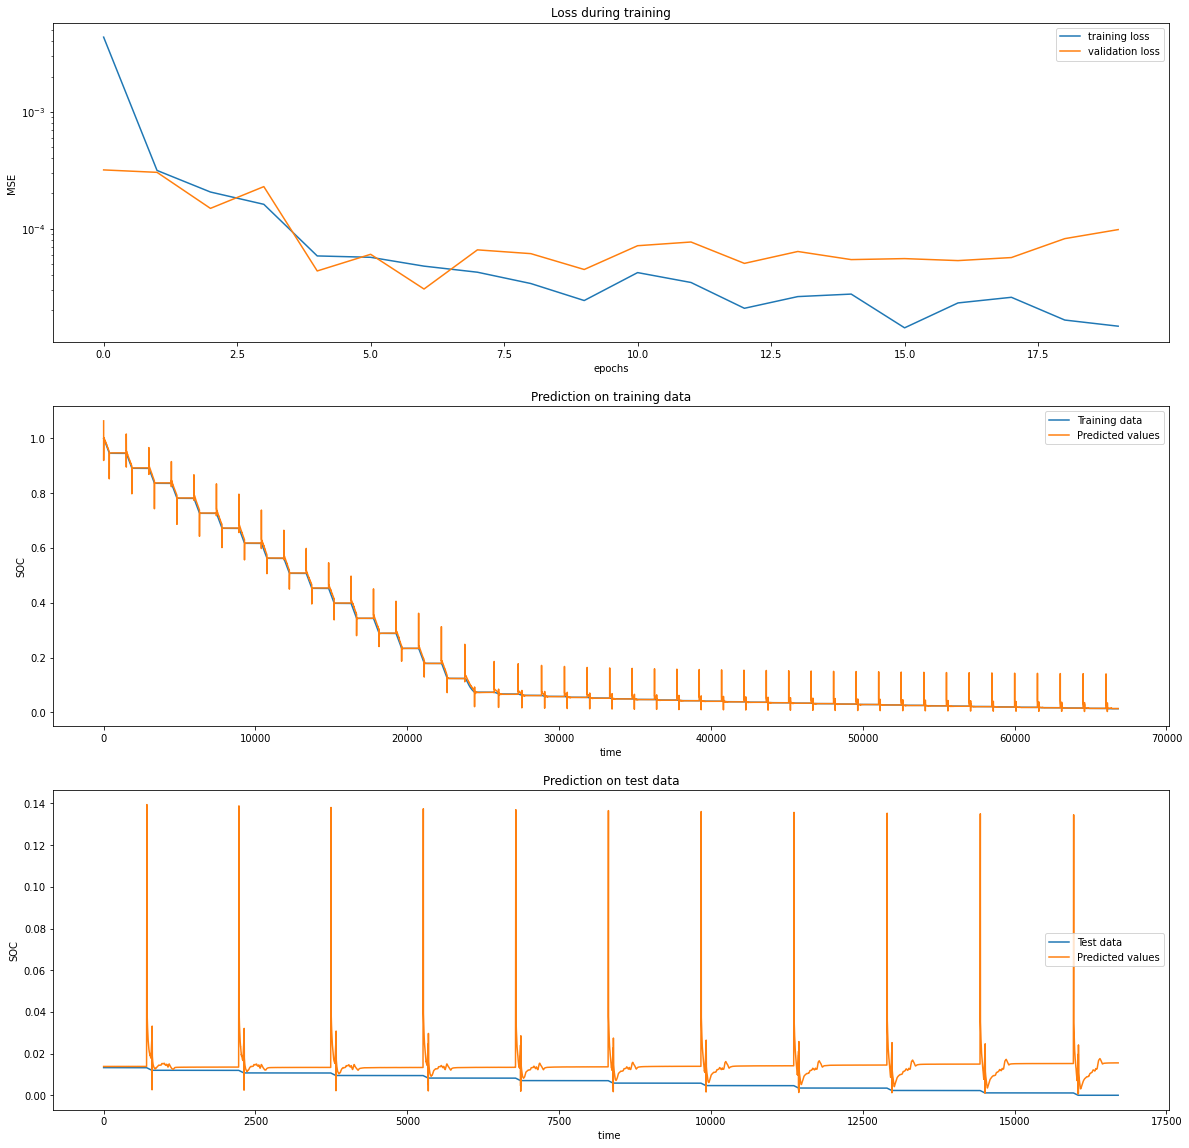






----------------------------------------------------------------------------------------------------


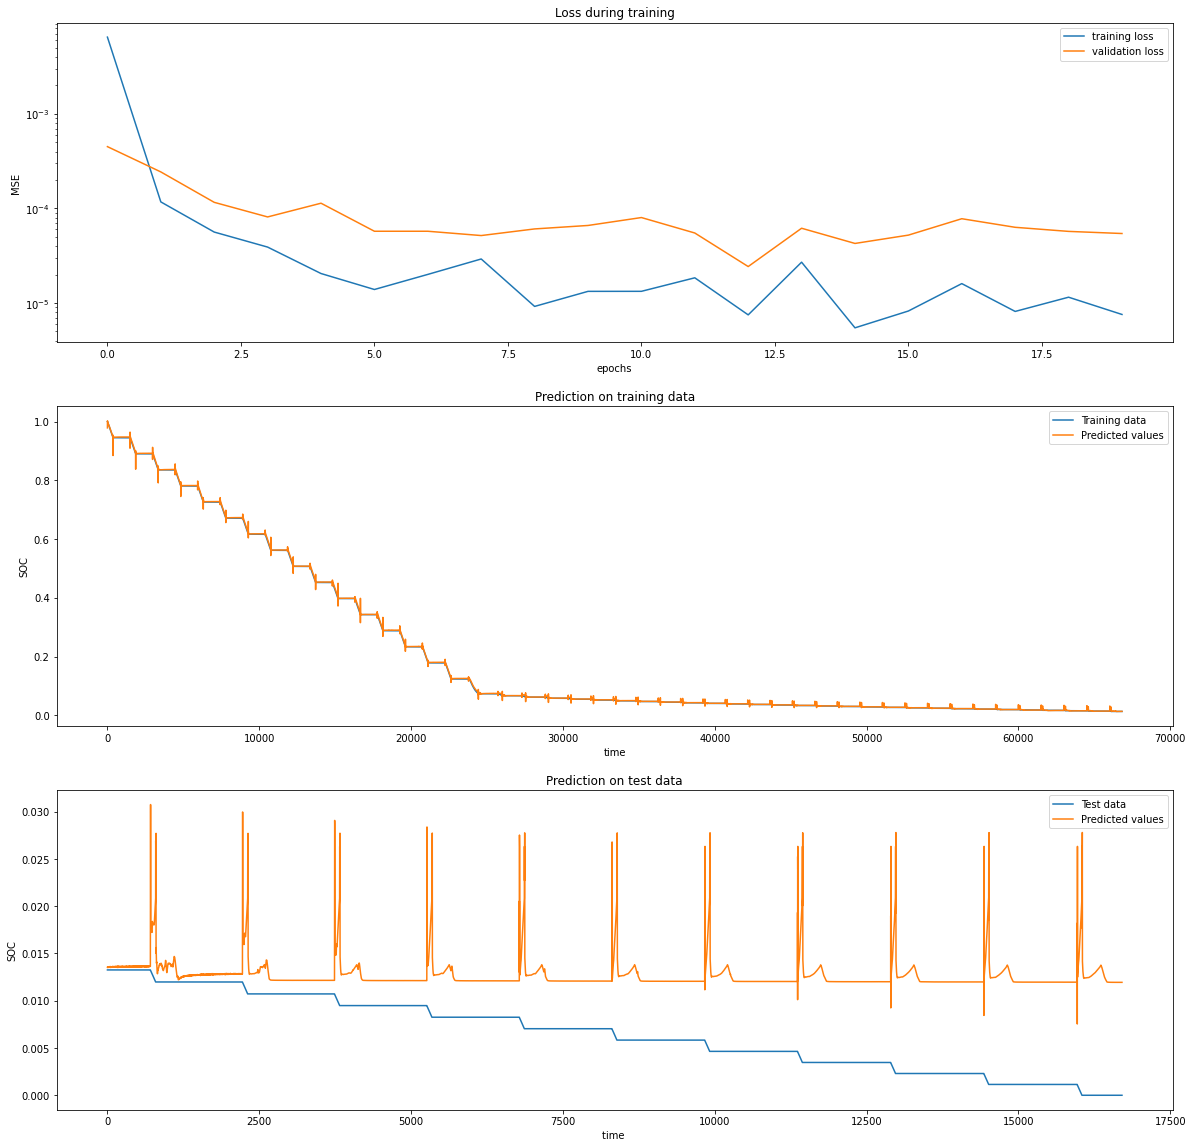






----------------------------------------------------------------------------------------------------


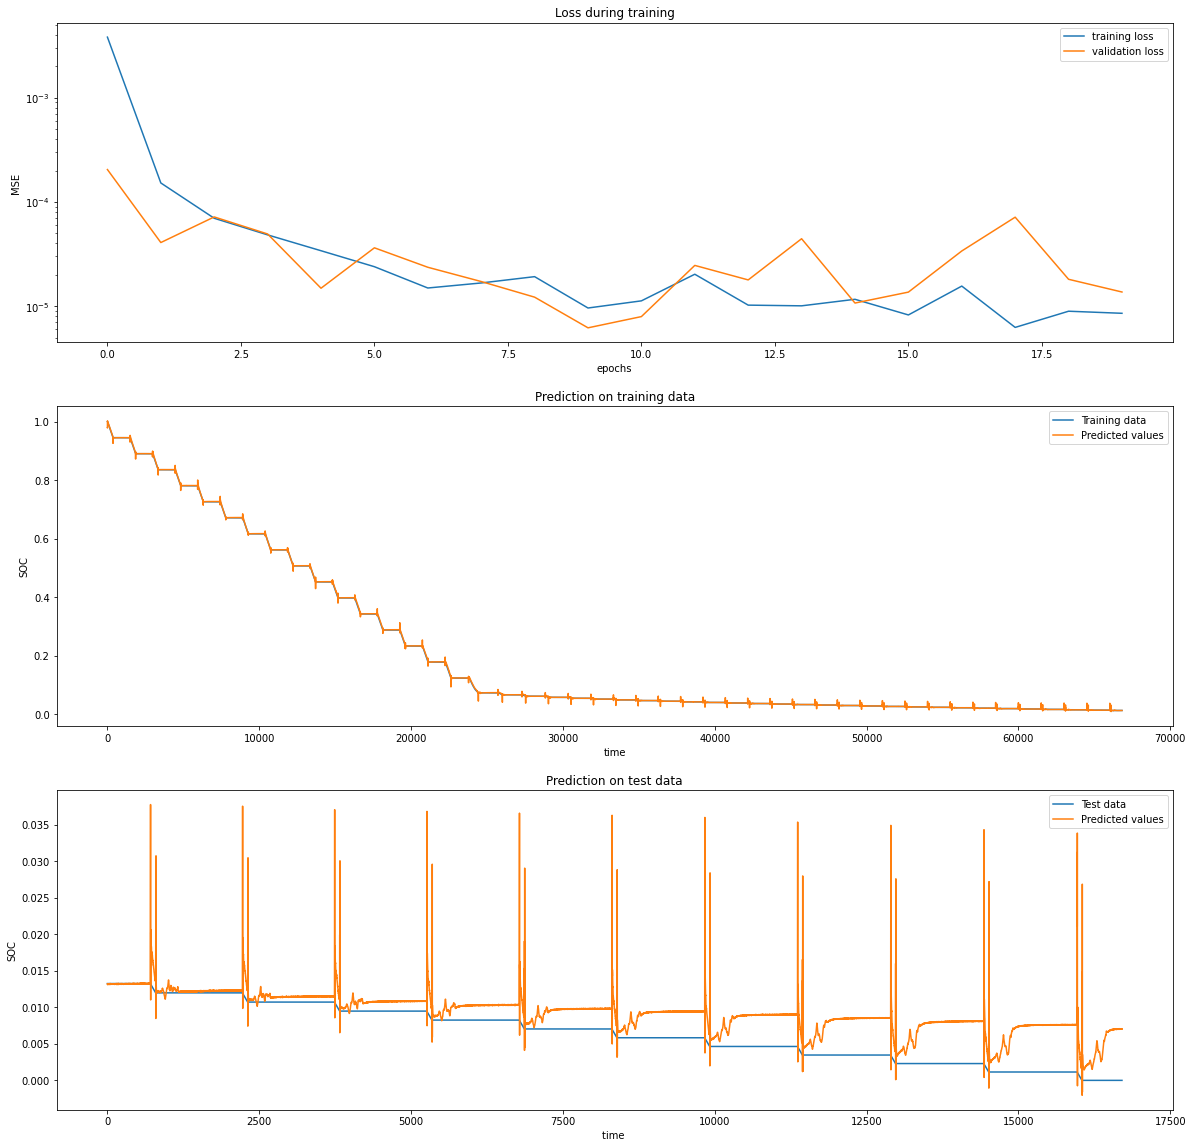






----------------------------------------------------------------------------------------------------


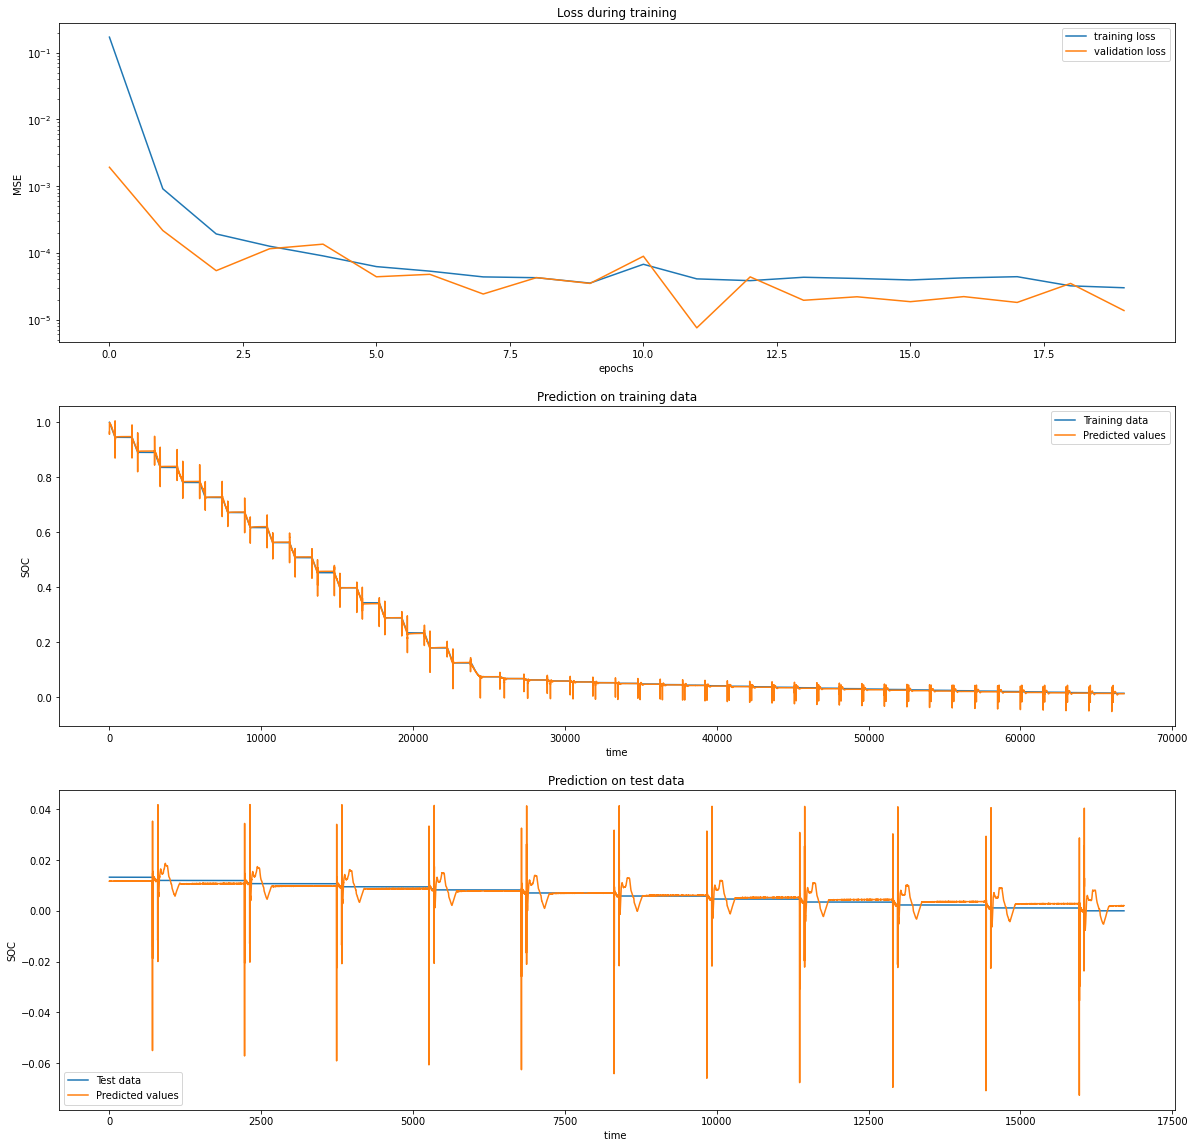






----------------------------------------------------------------------------------------------------


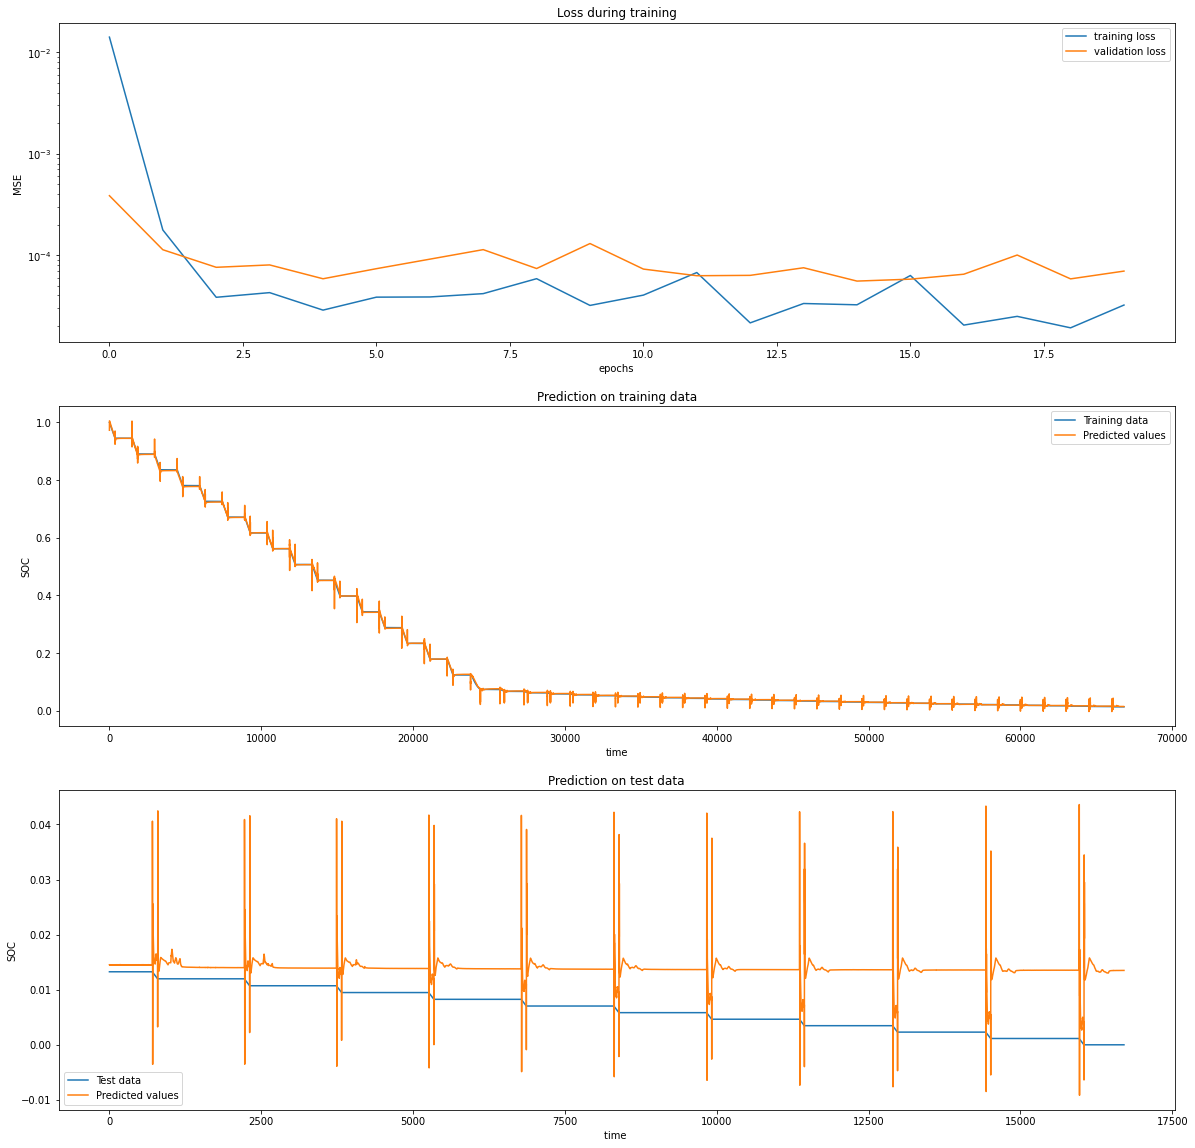






----------------------------------------------------------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_result(results,ytrain,ytest,xtrain,xtest,model):
  plt.subplots(figsize = (20, 20))
  train_loss=results.history['loss']
  val_loss=results.history['val_loss']
  plt.subplot(3, 1, 1)
  plt.semilogy(train_loss)
  plt.semilogy(val_loss)
  plt.title('Loss during training')
  plt.legend(['training loss', 'validation loss'])
  plt.xlabel('epochs')
  plt.ylabel('MSE')

  plt.subplot(3, 1, 2)


  plt.plot(ytrain)

  y_train_pred = model.predict(xtrain)

  plt.plot(y_train_pred)


  plt.legend(['Training data', 'Predicted values'])
  plt.xlabel('time')
  plt.ylabel('SOC')
  plt.title('Prediction on training data')


  plt.subplot(3, 1, 3)


  plt.plot(ytest)

  y_test_pred = model.predict(xtest)

  plt.plot(y_test_pred)


  plt.legend(['Test data', 'Predicted values'])
  plt.xlabel('time ')
  plt.ylabel('SOC')
  plt.title('Prediction on test data')

  plt.show()
  print('\n'*5+'-'*100)

plot_result(results3,ytrain3,ytest3,xtrain3,xtest3,model_matrix[0])
plot_result(results4,ytrain4,ytest4,xtrain4,xtest4,model_matrix[1])
plot_result(results5,ytrain5,ytest5,xtrain5,xtest5,model_matrix[2])
plot_result(results6,ytrain6,ytest6,xtrain6,xtest6,model_matrix[3])
plot_result(results7,ytrain7,ytest7,xtrain7,xtest7,model_matrix[4])
plot_result(results8,ytrain8,ytest8,xtrain8,xtest8,model_matrix[5])
plot_result(results9,ytrain9,ytest9,xtrain9,xtest9,model_matrix[6])
plot_result(results10,ytrain10,ytest10,xtrain10,xtest10,model_matrix[7])

In [ ]:
print('our validation loss for 3 sequence is :',results3.history['val_loss'][-1])
print('our validation loss for 4 sequence is :',results4.history['val_loss'][-1])
print('our validation loss for 5 sequence is :',results5.history['val_loss'][-1])
print('our validation loss for 6 sequence is :',results6.history['val_loss'][-1])
print('our validation loss for 7 sequence is :',results7.history['val_loss'][-1])
print('our validation loss for 8 sequence is :',results8.history['val_loss'][-1])
print('our validation loss for 9 sequence is :',results9.history['val_loss'][-1])
print('our validation loss for 10 sequence is :',results10.history['val_loss'][-1])

print('-'*100,'\n')

print('our train loss for 3 sequence is :',results3.history['loss'][-1])
print('our train loss for 4 sequence is :',results4.history['loss'][-1])
print('our train loss for 5 sequence is :',results5.history['loss'][-1])
print('our train loss for 6 sequence is :',results6.history['loss'][-1])
print('our train loss for 7 sequence is :',results7.history['loss'][-1])
print('our train loss for 8 sequence is :',results8.history['loss'][-1])
print('our train loss for 9 sequence is :',results9.history['loss'][-1])
print('our train loss for 10 sequence is :',results10.history['loss'][-1])

our validation loss for 3 sequence is : 6.8032877607038245e-06
our validation loss for 4 sequence is : 2.7442010832601227e-05
our validation loss for 5 sequence is : 6.391540227923542e-05
our validation loss for 6 sequence is : 9.815172961680219e-05
our validation loss for 7 sequence is : 5.4322204960044473e-05
our validation loss for 8 sequence is : 1.3661857337865513e-05
our validation loss for 9 sequence is : 1.3696821952180471e-05
our validation loss for 10 sequence is : 6.955437129363418e-05
---------------------------------------------------------------------------------------------------- 

our train loss for 3 sequence is : 3.159815241815522e-05
our train loss for 4 sequence is : 2.1904441382503137e-05
our train loss for 5 sequence is : 3.152411954943091e-05
our train loss for 6 sequence is : 1.4632585589424707e-05
our train loss for 7 sequence is : 7.566971362393815e-06
our train loss for 8 sequence is : 8.53732035466237e-06
our train loss for 9 sequence is : 3.005785583809483

# **Expriment II**


The goal of this experiment is to see the effect of different types of networks on this sequential dataset. Choose the best sequence length from the previous step and train the following models: MLP,GRU,LSTM

## MLP

data preprocess

In [ ]:
x_train_mlp=np.reshape(xtrain3,(xtrain3.shape[0],-1))
y_train_mlp=ytrain3
y_test_mlp=ytest3
x_test_mlp=np.reshape(xtest3,(xtest3.shape[0],-1))
x_test_mlp.shape

(16708, 9)

In [ ]:
xinput_mlp=Input(shape=(x_train_mlp.shape[1],))
hidden1_mlp=Dense(20,activation='relu')(input_mlp)
hidden2_mlp=Dense(20,'relu')(hidden1_mlp)
hidden3_mlp=Dense(5,'relu')(hidden2_mlp)
output_mlp=Dense(1,'linear')(hidden3_mlp)
model_mlp=Model(inputs=input_mlp,outputs=output_mlp)
model_mlp.summary()


Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 9)]               0         
                                                                 
 dense_76 (Dense)            (None, 20)                200       
                                                                 
 dense_77 (Dense)            (None, 20)                420       
                                                                 
 dense_78 (Dense)            (None, 5)                 105       
                                                                 
 dense_79 (Dense)            (None, 1)                 6         
                                                                 
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_mlp.compile(optimizer='adam',loss='mse')
results_mlp=model_mlp.fit(x_train_mlp,y_train_mlp,batch_size=100,epochs=20,validation_data=(x_test_mlp,y_test_mlp))

Epoch 1/20
669/669 [==============================] - 2s 2ms/step - loss: 0.0029 - val_loss: 2.9169e-04
Epoch 2/20
669/669 [==============================] - 2s 2ms/step - loss: 4.7856e-05 - val_loss: 1.4990e-04
Epoch 3/20
669/669 [==============================] - 2s 2ms/step - loss: 2.2442e-05 - val_loss: 9.4935e-05
Epoch 4/20
669/669 [==============================] - 2s 3ms/step - loss: 1.6237e-05 - val_loss: 8.1963e-05
Epoch 5/20
669/669 [==============================] - 2s 2ms/step - loss: 1.3901e-05 - val_loss: 7.5382e-05
Epoch 6/20
669/669 [==============================] - 2s 2ms/step - loss: 8.8405e-06 - val_loss: 6.4728e-05
Epoch 7/20
669/669 [==============================] - 2s 2ms/step - loss: 1.7231e-05 - val_loss: 6.3328e-05
Epoch 8/20
669/669 [==============================] - 2s 2ms/step - loss: 6.9914e-06 - val_loss: 6.1197e-05
Epoch 9/20
669/669 [==============================] - 2s 2ms/step - loss: 4.6482e-05 - val_loss: 1.0432e-04
Epoch 10/20
669/669 [===========

plotting

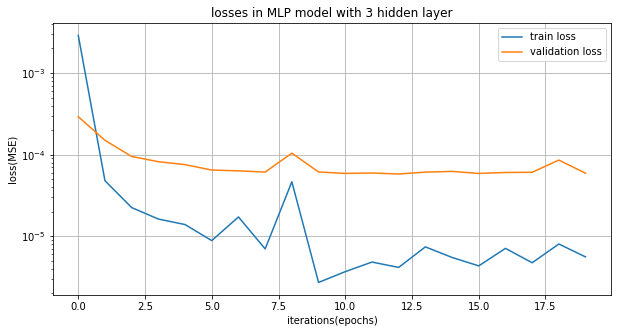

In [ ]:
from IPython.core.pylabtools import figsize
train_loss_mlp=results_mlp.history['loss']
validation_loss_mlp=results_mlp.history['val_loss']
plt.figure(figsize = (10,5))
plt.semilogy(train_loss_mlp)
plt.semilogy(validation_loss_mlp)
plt.legend(['train loss','validation loss'])
plt.title('losses in MLP model with 3 hidden layer')
plt.xlabel('iterations(epochs)')
plt.ylabel('loss(MSE)')
plt.grid()
plt.show()

In [ ]:
print('our validation loss for mlp is :',results_mlp.history['val_loss'][-1])

our validation loss for mlp is : 5.919233808526769e-05


## GRU

In [ ]:
from tensorflow.keras.layers import GRU,Dense,Input
from tensorflow.keras import Model

data preprocess

In [ ]:
from sklearn.model_selection import train_test_split

data=np.array(df)

def data_preprocess(Length):
  X=np.empty((len(data[:,0])-Length,Length,3))
  for i in range((len(data[:,0])-Length)):
    X[i,:,:]=data[i:i+Length,1:]
  y=np.empty((len(data[:])-Length,1))
  y[:,0]=data[Length:,3]

  x=X-X.mean((0,1))/X.max((0,1))-X.min((0,1))
  x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.2,shuffle=False)
  return x_train,y_train,x_test,y_test

  print(x_train.shape)


xtrain_GRU,xtest_GRU,ytrain_GRU,ytest_GRU=data_preprocess(3)

**model**

In [ ]:
input_GRU= Input(shape=(3,3))
hidden1_GRU=GRU(20,activation='relu',return_sequences=True)(input_GRU)
hidden2_GRU=GRU(20,activation='relu',return_sequences=True)(hidden1_GRU)
hidden3_GRU=GRU(20,activation='relu',return_sequences=False)(hidden2_GRU)
output_GRU=Dense(1,activation='linear')(hidden3_GRU)

model_GRU=Model(inputs=input_GRU,outputs=output_GRU)
model_GRU.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 3, 3)]            0         
                                                                 
 gru_12 (GRU)                (None, 3, 20)             1500      
                                                                 
 gru_13 (GRU)                (None, 3, 20)             2520      
                                                                 
 gru_14 (GRU)                (None, 20)                2520      
                                                                 
 dense_83 (Dense)            (None, 1)                 21        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


fit the model

In [ ]:
model_GRU.compile(optimizer='adam',loss='MSE')
results_GRU=model_GRU.fit(xtrain_GRU,ytrain_GRU,batch_size=100,epochs=20,validation_data=(xtest_GRU,ytest_GRU))

Epoch 1/20
669/669 [==============================] - 10s 10ms/step - loss: 0.0046 - val_loss: 2.0440e-04
Epoch 2/20
669/669 [==============================] - 6s 9ms/step - loss: 5.0744e-05 - val_loss: 7.4283e-05
Epoch 3/20
669/669 [==============================] - 6s 9ms/step - loss: 2.0162e-05 - val_loss: 1.8691e-05
Epoch 4/20
669/669 [==============================] - 6s 10ms/step - loss: 7.2690e-06 - val_loss: 2.8208e-05
Epoch 5/20
669/669 [==============================] - 6s 9ms/step - loss: 5.3314e-06 - val_loss: 7.4078e-06
Epoch 6/20
669/669 [==============================] - 7s 10ms/step - loss: 2.1536e-06 - val_loss: 7.0973e-06
Epoch 7/20
669/669 [==============================] - 6s 9ms/step - loss: 2.3682e-06 - val_loss: 4.1296e-06
Epoch 8/20
669/669 [==============================] - 6s 9ms/step - loss: 3.7095e-06 - val_loss: 4.3033e-06
Epoch 9/20
669/669 [==============================] - 7s 10ms/step - loss: 3.9150e-06 - val_loss: 1.0930e-05
Epoch 10/20
669/669 [======

plotting

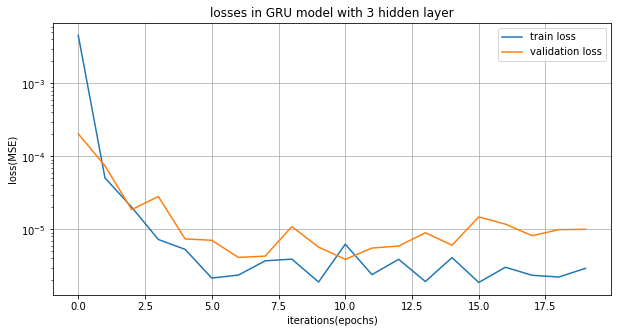

In [ ]:
from IPython.core.pylabtools import figsize
train_loss_GRU=results_GRU.history['loss']
validation_loss_GRU=results_GRU.history['val_loss']
plt.figure(figsize = (10,5))
plt.semilogy(train_loss_GRU)
plt.semilogy(validation_loss_GRU)
plt.legend(['train loss','validation loss'])
plt.title('losses in GRU model with 3 hidden layer')
plt.xlabel('iterations(epochs)')
plt.ylabel('loss(MSE)')
plt.grid()
plt.show()

In [ ]:
print('our validation loss with GRU model is ',results_GRU.history['val_loss'][-1])

our validation loss with GRU model is  1.0029185432358645e-05


## LSTM

In [ ]:
from tensorflow.keras.layers import Input,Dense,LSTM
from tensorflow.keras import Model

data preprocess

In [ ]:
from sklearn.model_selection import train_test_split

data=np.array(df)

def data_preprocess(Length):
  X=np.empty((len(data[:,0])-Length,Length,3))
  for i in range((len(data[:,0])-Length)):
    X[i,:,:]=data[i:i+Length,1:]
  y=np.empty((len(data[:])-Length,1))
  y[:,0]=data[Length:,3]

  x=X-X.mean((0,1))/X.max((0,1))-X.min((0,1))
  x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.2,shuffle=False)
  return x_train,y_train,x_test,y_test

  print(x_train.shape)


xtrain_LSTM,xtest_LSTM,ytrain_LSTM,ytest_LSTM=data_preprocess(3)

**model**

In [ ]:
input_LSTM=Input(shape=(3,3))
hidden1_LSTM = LSTM(20,activation='relu', return_sequences=True)(input_LSTM)
hidden2_LSTM = LSTM(20,activation='relu',return_sequences=True)(hidden1_LSTM)
hidden3_LSTM = LSTM(5,activation='relu',return_sequences=False)(hidden2_LSTM)
output_LSTM = Dense(1,activation='linear')(hidden3_LSTM)

model_LSTM = Model(input_LSTM,output_LSTM)
model_LSTM.summary()

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 3, 3)]            0         
                                                                 
 lstm_10 (LSTM)              (None, 3, 20)             1920      
                                                                 
 lstm_11 (LSTM)              (None, 3, 20)             3280      
                                                                 
 lstm_12 (LSTM)              (None, 5)                 520       
                                                                 
 dense_85 (Dense)            (None, 1)                 6         
                                                                 
Total params: 5,726
Trainable params: 5,726
Non-trainable params: 0
_________________________________________________________________


fitting LSTM model

In [ ]:
model_LSTM.compile(optimizer='adam',loss='MSE')
results_LSTM = model_LSTM.fit(xtrain_LSTM,ytrain_LSTM,batch_size=100,epochs=20,validation_data=(xtest_LSTM,ytest_LSTM))

Epoch 1/20
669/669 [==============================] - 9s 9ms/step - loss: 8.3321e-06 - val_loss: 1.1221e-05
Epoch 2/20
669/669 [==============================] - 6s 9ms/step - loss: 1.2068e-06 - val_loss: 1.4707e-05
Epoch 3/20
669/669 [==============================] - 6s 9ms/step - loss: 1.3659e-06 - val_loss: 1.1876e-05
Epoch 4/20
669/669 [==============================] - 6s 9ms/step - loss: 1.9922e-06 - val_loss: 1.3944e-05
Epoch 5/20
669/669 [==============================] - 6s 9ms/step - loss: 2.4539e-06 - val_loss: 1.8984e-05
Epoch 6/20
669/669 [==============================] - 6s 9ms/step - loss: 2.9433e-06 - val_loss: 2.7481e-05
Epoch 7/20
669/669 [==============================] - 6s 9ms/step - loss: 1.4397e-06 - val_loss: 1.3173e-05
Epoch 8/20
669/669 [==============================] - 6s 9ms/step - loss: 2.6463e-06 - val_loss: 3.5722e-05
Epoch 9/20
669/669 [==============================] - 6s 9ms/step - loss: 1.4929e-06 - val_loss: 1.9803e-05
Epoch 10/20
669/669 [=======

plotting

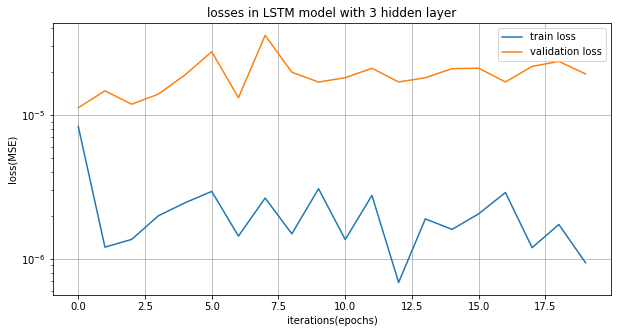

In [ ]:
from IPython.core.pylabtools import figsize
train_loss_LSTM=results_LSTM.history['loss']
validation_loss_LSTM=results_LSTM.history['val_loss']
plt.figure(figsize = (10,5))
plt.semilogy(train_loss_LSTM)
plt.semilogy(validation_loss_LSTM)
plt.legend(['train loss','validation loss'])
plt.title('losses in LSTM model with 3 hidden layer')
plt.xlabel('iterations(epochs)')
plt.ylabel('loss(MSE)')
plt.grid()
plt.show()

In [ ]:
print('our validation loss with LSTM model is ',results_LSTM.history['val_loss'][-1])

our validation loss with LSTM model is  1.9262737623648718e-05
